In [1]:
# 1.加载所需模块                          #cv2模块
from sklearn import datasets            #Sklearn数据模块
from sklearn import metrics             #Sklearn衡量模块
from sklearn import model_selection     #Sklearn划分训练和测试模块
from sklearn import linear_model        #Sklearn线性回归模块
import matplotlib.pyplot as plt         #绘制表格模块

In [2]:
# 2.添加数据，并查看数据结构和形式
boston = datasets.load_boston()
print('数据的特征的名称:',boston.feature_names)
print('数据的特征信息的格式:',boston.data.shape)
print('结果信息的格式:',boston.target.shape)

数据的特征的名称: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
数据的特征信息的格式: (506, 13)
结果信息的格式: (506,)


In [3]:
# 3.将数据分为训练数据集和测试数据集
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=42)
print('训练数据的特征信息的格式:',X_train.shape)
print('训练结果信息的格式:',y_train.shape)
print('测试数据的特征信息的格式:',X_test.shape)
print('测试结果信息的格式:',y_test.shape)

训练数据的特征信息的格式: (455, 13)
训练结果信息的格式: (455,)
测试数据的特征信息的格式: (51, 13)
测试结果信息的格式: (51,)


In [4]:
#4.训练模型
linreg = linear_model.LinearRegression()        #创建LinearRegression模型对象
linreg.fit(X_train, y_train)                    #输入训练数据，训练LinearRegression训练模型
#输出均方误差，查看训练效果
MeanSquEr=metrics.mean_squared_error(y_train,linreg.predict(X_train))  
print('训练数据的均方误差:',MeanSquEr)
#输出训练的score值（R方值）
score=linreg.score(X_train, y_train)
print('在训练集上的准确率:',score)

训练数据的均方误差: 22.7375901544866
在训练集上的准确率: 0.7375152736886281


In [5]:
#5.测试模型
y_pred = linreg.predict(X_test)     #输入测试数据通过LinearRegression训练模型获得预测结果
#获取测试结果和预测结果之间的均方误差
MeanSquEr1=metrics.mean_squared_error(y_test, y_pred)
print('测试数据的均方误差:',MeanSquEr1)

测试数据的均方误差: 14.995852876582285


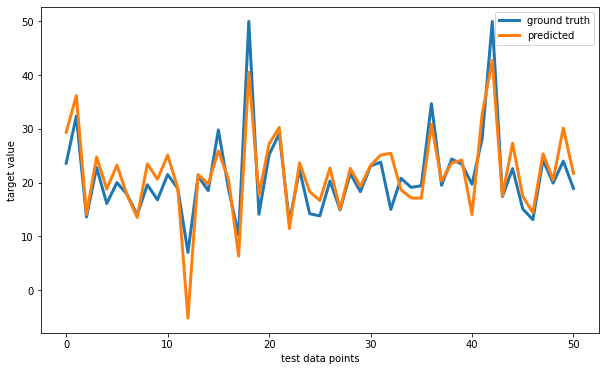

In [6]:
#6.通过图像形象的显示出真实值和预测值之间的误差
plt.figure(figsize=(10, 6))
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted')
plt.legend(loc='best')
plt.xlabel('test data points')
plt.ylabel('target value')
plt.show()

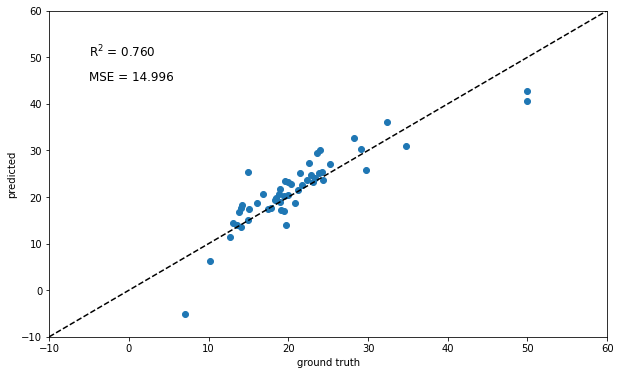

In [7]:
#7.显示模型预测值和真实值之间的对比   点为真实值  虚线为预测值
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10, 60, -10, 60])
plt.xlabel('ground truth')
plt.ylabel('predicted')
scorestr = r'R$^2$ = %.3f' % linreg.score(X_test, y_test)
errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12);
plt.show()